In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels import regression

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

In [45]:
solved_mapdf = pd.read_csv('solved_map_df.csv')

In [46]:
solved_mapdf.head()

Unnamed: 0                id     cntyfips      ori    state  \
0           1  197701001AL00400  Autauga, AL  AL00400  Alabama   
1           2  197703001AL00400  Autauga, AL  AL00400  Alabama   
2           3  197703001AL00401  Autauga, AL  AL00401  Alabama   
3           4  197708001AL00400  Autauga, AL  AL00400  Alabama   
4           5  197710001AL00400  Autauga, AL  AL00400  Alabama   

           agency          agentype source solved  year  ...  \
0  Autauga County           Sheriff    FBI    Yes  1977  ...   
1  Autauga County           Sheriff    FBI    Yes  1977  ...   
2      Prattville  Municipal police    FBI    Yes  1977  ...   
3  Autauga County           Sheriff    FBI    Yes  1977  ...   
4  Autauga County           Sheriff    FBI    Yes  1977  ...   

                 offethnic                           weapon  relationship  \
0  Unknown or not reported            Other or type unknown  Acquaintance   
1  Unknown or not reported  Handgun - pistol, revolver, etc  Acquaintance   
2  Unknown or not reported                          Shotgun       Husband   
3  Unknown or not reported      Knife or cutting instrument  Acquaintance   
4  Unknown or not reported                          Shotgun      Stranger   

                        circumstance viccount  offcount             msa  \
0  Brawl due to influence of alcohol        0         0  Montgomery, AL   
1                    Other arguments        0         1  Montgomery, AL   
2                    Other arguments        0         0  Montgomery, AL   
3         Circumstances undetermined        0         0  Montgomery, AL   
4                            Robbery        0         0  Montgomery, AL   

  year_str     monthyear    datetime  
0     1977  January-1977  1977-01-01  
1     1977    March-1977  1977-03-01  
2     1977    March-1977  1977-03-01  
3     1977   August-1977  1977-08-01  
4     1977  October-1977  1977-10-01  

[5 rows x 32 columns]

In [47]:
solved_mapdf.columns

Index(['Unnamed: 0', 'id', 'cntyfips', 'ori', 'state', 'agency', 'agentype',
       'source', 'solved', 'year', 'month', 'incident', 'actiontype',
       'homicide', 'situation', 'vicage', 'vicsex', 'vicrace', 'vicethnic',
       'offage', 'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'viccount', 'offcount', 'msa', 'year_str', 'monthyear',
       'datetime'],
      dtype='object')

In [48]:
state_map = {
    'Alabama': 0,
    'Alaska': 1,
    'Arizona': 2,
    'Arkansas': 3,
    'California': 4,
    'Colorado': 5,
    'Connecticut': 6,
    'Delaware': 7,
    'Florida': 8,
    'Georgia': 9,
    'Hawaii': 10,
    'Idaho': 11,
    'Illinois': 12,
    'Indiana': 13,
    'Iowa': 14,
    'Kansas': 15,
    'Kentucky': 16,
    'Louisiana': 17,
    'Maine': 18,
    'Maryland': 19,
    'Massachusetts': 20,
    'Michigan': 21,
    'Minnesota': 22,
    'Mississippi': 23,
    'Missouri': 24,
    'Montana': 25,
    'Nebraska': 26,
    'Nevada': 27,
    'New Hampshire': 28,
    'New Jersey': 29,
    'New Mexico': 30,
    'New York': 31,
    'North Carolina': 32,
    'North Dakota': 33,
    'Ohio': 34,
    'Oklahoma': 35,
    'Oregon': 36,
    'Pennsylvania': 37,
    'Rhode Island': 38,
    'Rhodes Island': 38,
    'South Carolina': 39,
    'South Dakota': 40,
    'Tennessee': 41,
    'Texas': 42,
    'Utah': 43,
    'Vermont': 44,
    'Virginia': 45,
    'Washington': 46,
    'West Virginia': 47,
    'Wisconsin': 48,
    'Wyoming': 49,
    'District of Columbia': 50,
    'PAPSP8': 51
 }

In [49]:
month_map = {
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
}

In [50]:
solved_mapdf['state_map'] = solved_mapdf['state'].map(state_map)

In [51]:
solved_mapdf['month_map'] = solved_mapdf['month'].map(month_map)

In [52]:
weapon_list = solved_mapdf.weapon.unique().tolist()

In [53]:
weapon_list

['Other or type unknown',
 'Handgun - pistol, revolver, etc',
 'Shotgun',
 'Knife or cutting instrument',
 'Blunt object - hammer, club, etc',
 'Rifle',
 'Personal weapons, includes beating',
 'Firearm, type not stated',
 'Drowning',
 'Narcotics or drugs, sleeping pills',
 'Fire',
 'Strangulation - hanging',
 'Asphyxiation - includes death by gas',
 'Explosives',
 'Poison - does not include gas',
 'Pushed or thrown out window',
 'Other gun']

In [54]:
weapon_map = {a:b for b,a in enumerate(weapon_list)}

In [55]:
solved_mapdf['weapon_map'] = solved_mapdf['weapon'].map(weapon_map)

In [56]:
homicide_list = solved_mapdf.homicide.unique().tolist()

In [57]:
homicide_map = {a:b for b,a in enumerate(homicide_list)}
solved_mapdf['homicide_map'] = solved_mapdf['homicide'].map(homicide_map)

In [58]:
situation_list = solved_mapdf.situation.unique().tolist()
situation_map = {a:b for b,a in enumerate(situation_list)}
solved_mapdf['situation_map'] = solved_mapdf['situation'].map(situation_map)

In [59]:
relationship_list = solved_mapdf.relationship.unique().tolist()
relationship_map = {a:b for b,a in enumerate(relationship_list)}
solved_mapdf['relationship_map'] = solved_mapdf['relationship'].map(relationship_map)

In [60]:
# def auto_map(col_name):
    #list_map = X[col_name].unique().tolist()
    #mapped = {a:b for b,a in enumerate(list_map)}
    #X[col_name + 'map'] = X[col_name].map(mapped)

In [61]:
vicsex_list = solved_mapdf.vicsex.unique().tolist()
vicsex_map = {a:b for b,a in enumerate(vicsex_list)}
solved_mapdf['vicsex_map'] = solved_mapdf['vicsex'].map(vicsex_map)

vicrace_list = solved_mapdf.vicrace.unique().tolist()
vicrace_map = {a:b for b,a in enumerate(vicrace_list)}
solved_mapdf['vicrace_map'] = solved_mapdf['vicrace'].map(vicrace_map)

vicethnic_list = solved_mapdf.vicethnic.unique().tolist()
vicethnic_map = {a:b for b,a in enumerate(vicethnic_list)}
solved_mapdf['vicethnicp_map'] = solved_mapdf['vicethnic'].map(vicethnic_map)

offsex_list = solved_mapdf.offsex.unique().tolist()
offsex_map = {a:b for b,a in enumerate(offsex_list)}
solved_mapdf['offsex_map'] = solved_mapdf['offsex'].map(offsex_map)

offethnic_list = solved_mapdf.offethnic.unique().tolist()
offethnic_map = {a:b for b,a in enumerate(offethnic_list)}
solved_mapdf['offethnic_map'] = solved_mapdf['offethnic'].map(offethnic_map)

offrace_list = solved_mapdf.offrace.unique().tolist()
offrace_map = {a:b for b,a in enumerate(offrace_list)}
solved_mapdf['offrace_map'] = solved_mapdf['offrace'].map(offrace_map)

In [62]:
solved_mapdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583230 entries, 0 to 583229
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        583230 non-null  int64 
 1   id                583230 non-null  object
 2   cntyfips          583230 non-null  object
 3   ori               583230 non-null  object
 4   state             583230 non-null  object
 5   agency            583230 non-null  object
 6   agentype          583230 non-null  object
 7   source            583230 non-null  object
 8   solved            583230 non-null  object
 9   year              583230 non-null  int64 
 10  month             583230 non-null  object
 11  incident          583230 non-null  int64 
 12  actiontype        583230 non-null  object
 13  homicide          583230 non-null  object
 14  situation         583230 non-null  object
 15  vicage            583230 non-null  int64 
 16  vicsex            583230 non-null  obj

In [63]:
solved_mapdf.drop(columns = 'Unnamed: 0', inplace = True)

In [64]:
solved_mapdf.columns

Index(['id', 'cntyfips', 'ori', 'state', 'agency', 'agentype', 'source',
       'solved', 'year', 'month', 'incident', 'actiontype', 'homicide',
       'situation', 'vicage', 'vicsex', 'vicrace', 'vicethnic', 'offage',
       'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'viccount', 'offcount', 'msa', 'year_str', 'monthyear',
       'datetime', 'state_map', 'month_map', 'weapon_map', 'homicide_map',
       'situation_map', 'relationship_map', 'vicsex_map', 'vicrace_map',
       'vicethnicp_map', 'offsex_map', 'offethnic_map', 'offrace_map'],
      dtype='object')

In [65]:
solved_mapdf['offage'] = solved_mapdf['offage'].replace(999, solved_mapdf['offage'].mean())
solved_mapdf['vicage'] = solved_mapdf['vicage'].replace(999, solved_mapdf['vicage'].mean())

In [66]:
solved_mapdf = solved_mapdf[solved_mapdf['offage']>= 16]

In [67]:
solved_mapdf = solved_mapdf[solved_mapdf['offage']<= 65]

In [68]:
solved_mapdf[solved_mapdf.isnull().any(axis = 1)]['state'].value_counts()

Series([], Name: state, dtype: int64)

In [69]:
solved_mapdf.to_csv('OHE_solved_map.csv')

In [70]:
solved_mapdf.columns

Index(['id', 'cntyfips', 'ori', 'state', 'agency', 'agentype', 'source',
       'solved', 'year', 'month', 'incident', 'actiontype', 'homicide',
       'situation', 'vicage', 'vicsex', 'vicrace', 'vicethnic', 'offage',
       'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'viccount', 'offcount', 'msa', 'year_str', 'monthyear',
       'datetime', 'state_map', 'month_map', 'weapon_map', 'homicide_map',
       'situation_map', 'relationship_map', 'vicsex_map', 'vicrace_map',
       'vicethnicp_map', 'offsex_map', 'offethnic_map', 'offrace_map'],
      dtype='object')

In [26]:
solved_mapdf.corr()

year  incident    vicage    offage  viccount  offcount  \
year              1.000000  0.127708  0.025486  0.028993  0.045209  0.091236   
incident          0.127708  1.000000  0.008619  0.004483 -0.020502 -0.005463   
vicage            0.025486  0.008619  1.000000  0.328267 -0.016805 -0.035678   
offage            0.028993  0.004483  0.328267  1.000000  0.017507 -0.175498   
viccount          0.045209 -0.020502 -0.016805  0.017507  1.000000  0.050912   
offcount          0.091236 -0.005463 -0.035678 -0.175498  0.050912  1.000000   
year_str          1.000000  0.127708  0.025486  0.028993  0.045209  0.091236   
offrace_ohe       0.019299 -0.002785 -0.050756 -0.097512 -0.022686  0.022499   
state_map         0.020009 -0.158057  0.007924  0.011120  0.019088  0.018597   
month_map        -0.003236 -0.004177 -0.000843  0.002380 -0.009424 -0.006669   
weapon_map        0.071095  0.030810 -0.000110 -0.002423  0.088521  0.013641   
homicide_map      0.069004  0.043310 -0.054817 -0.013517 -0.007632 -0.022442   
situation_map     0.096294 -0.006461 -0.030328 -0.091171  0.622975  0.477629   
relationship_map  0.138886  0.073741  0.048330  0.075831  0.023201 -0.071959   
vicsex_map       -0.022042  0.000359 -0.034142 -0.155158 -0.085616  0.098680   
vicrace_map       0.041582 -0.022487  0.088047  0.068472  0.060240  0.010678   
vicethnicp_map    0.072926 -0.123275  0.020686  0.026357 -0.018754 -0.026908   
offsex_map       -0.054218 -0.015591  0.005142  0.061867 -0.032729 -0.039541   
offethnic_map     0.043606 -0.119430  0.014284  0.026080 -0.015890 -0.032631   
offrace_map       0.027654 -0.028181  0.045730  0.101280  0.055672 -0.015643   

                  year_str  offrace_ohe  state_map  month_map  weapon_map  \
year              1.000000     0.019299   0.020009  -0.003236    0.071095   
incident          0.127708    -0.002785  -0.158057  -0.004177    0.030810   
vicage            0.025486    -0.050756   0.007924  -0.000843   -0.000110   
offage            0.028993    -0.097512   0.011120   0.002380   -0.002423   
viccount          0.045209    -0.022686   0.019088  -0.009424    0.088521   
offcount          0.091236     0.022499   0.018597  -0.006669    0.013641   
year_str          1.000000     0.019299   0.020009  -0.003236    0.071095   
offrace_ohe       0.019299     1.000000  -0.000526   0.001887   -0.026217   
state_map         0.020009    -0.000526   1.000000   0.002685    0.018215   
month_map        -0.003236     0.001887   0.002685   1.000000   -0.002954   
weapon_map        0.071095    -0.026217   0.018215  -0.002954    1.000000   
homicide_map      0.069004    -0.037300   0.004388   0.000595    0.009820   
situation_map     0.096294    -0.009894   0.015262  -0.011136    0.038612   
relationship_map  0.138886    -0.029271  -0.052004  -0.004047    0.081940   
vicsex_map       -0.022042     0.045021  -0.011253   0.006892   -0.115708   
vicrace_map       0.041582    -0.202985  -0.041069   0.003155    0.066162   
vicethnicp_map    0.072926    -0.013947  -0.006630  -0.000358   -0.008682   
offsex_map       -0.054218     0.022748   0.011171  -0.002185    0.034323   
offethnic_map     0.043606    -0.001166  -0.013921   0.001177   -0.014506   
offrace_map       0.027654    -0.080303  -0.040222   0.001074    0.061797   

                  homicide_map  situation_map  relationship_map  vicsex_map  \
year                  0.069004       0.096294          0.138886   -0.022042   
incident              0.043310      -0.006461          0.073741    0.000359   
vicage               -0.054817      -0.030328          0.048330   -0.034142   
offage               -0.013517      -0.091171          0.075831   -0.155158   
viccount             -0.007632       0.622975          0.023201   -0.085616   
offcount             -0.022442       0.477629         -0.071959    0.098680   
year_str              0.069004       0.096294          0.138886   -0.022042   
offrace_ohe          -0.037300      -0.009894         -0.029271    0.045021   
state_map   

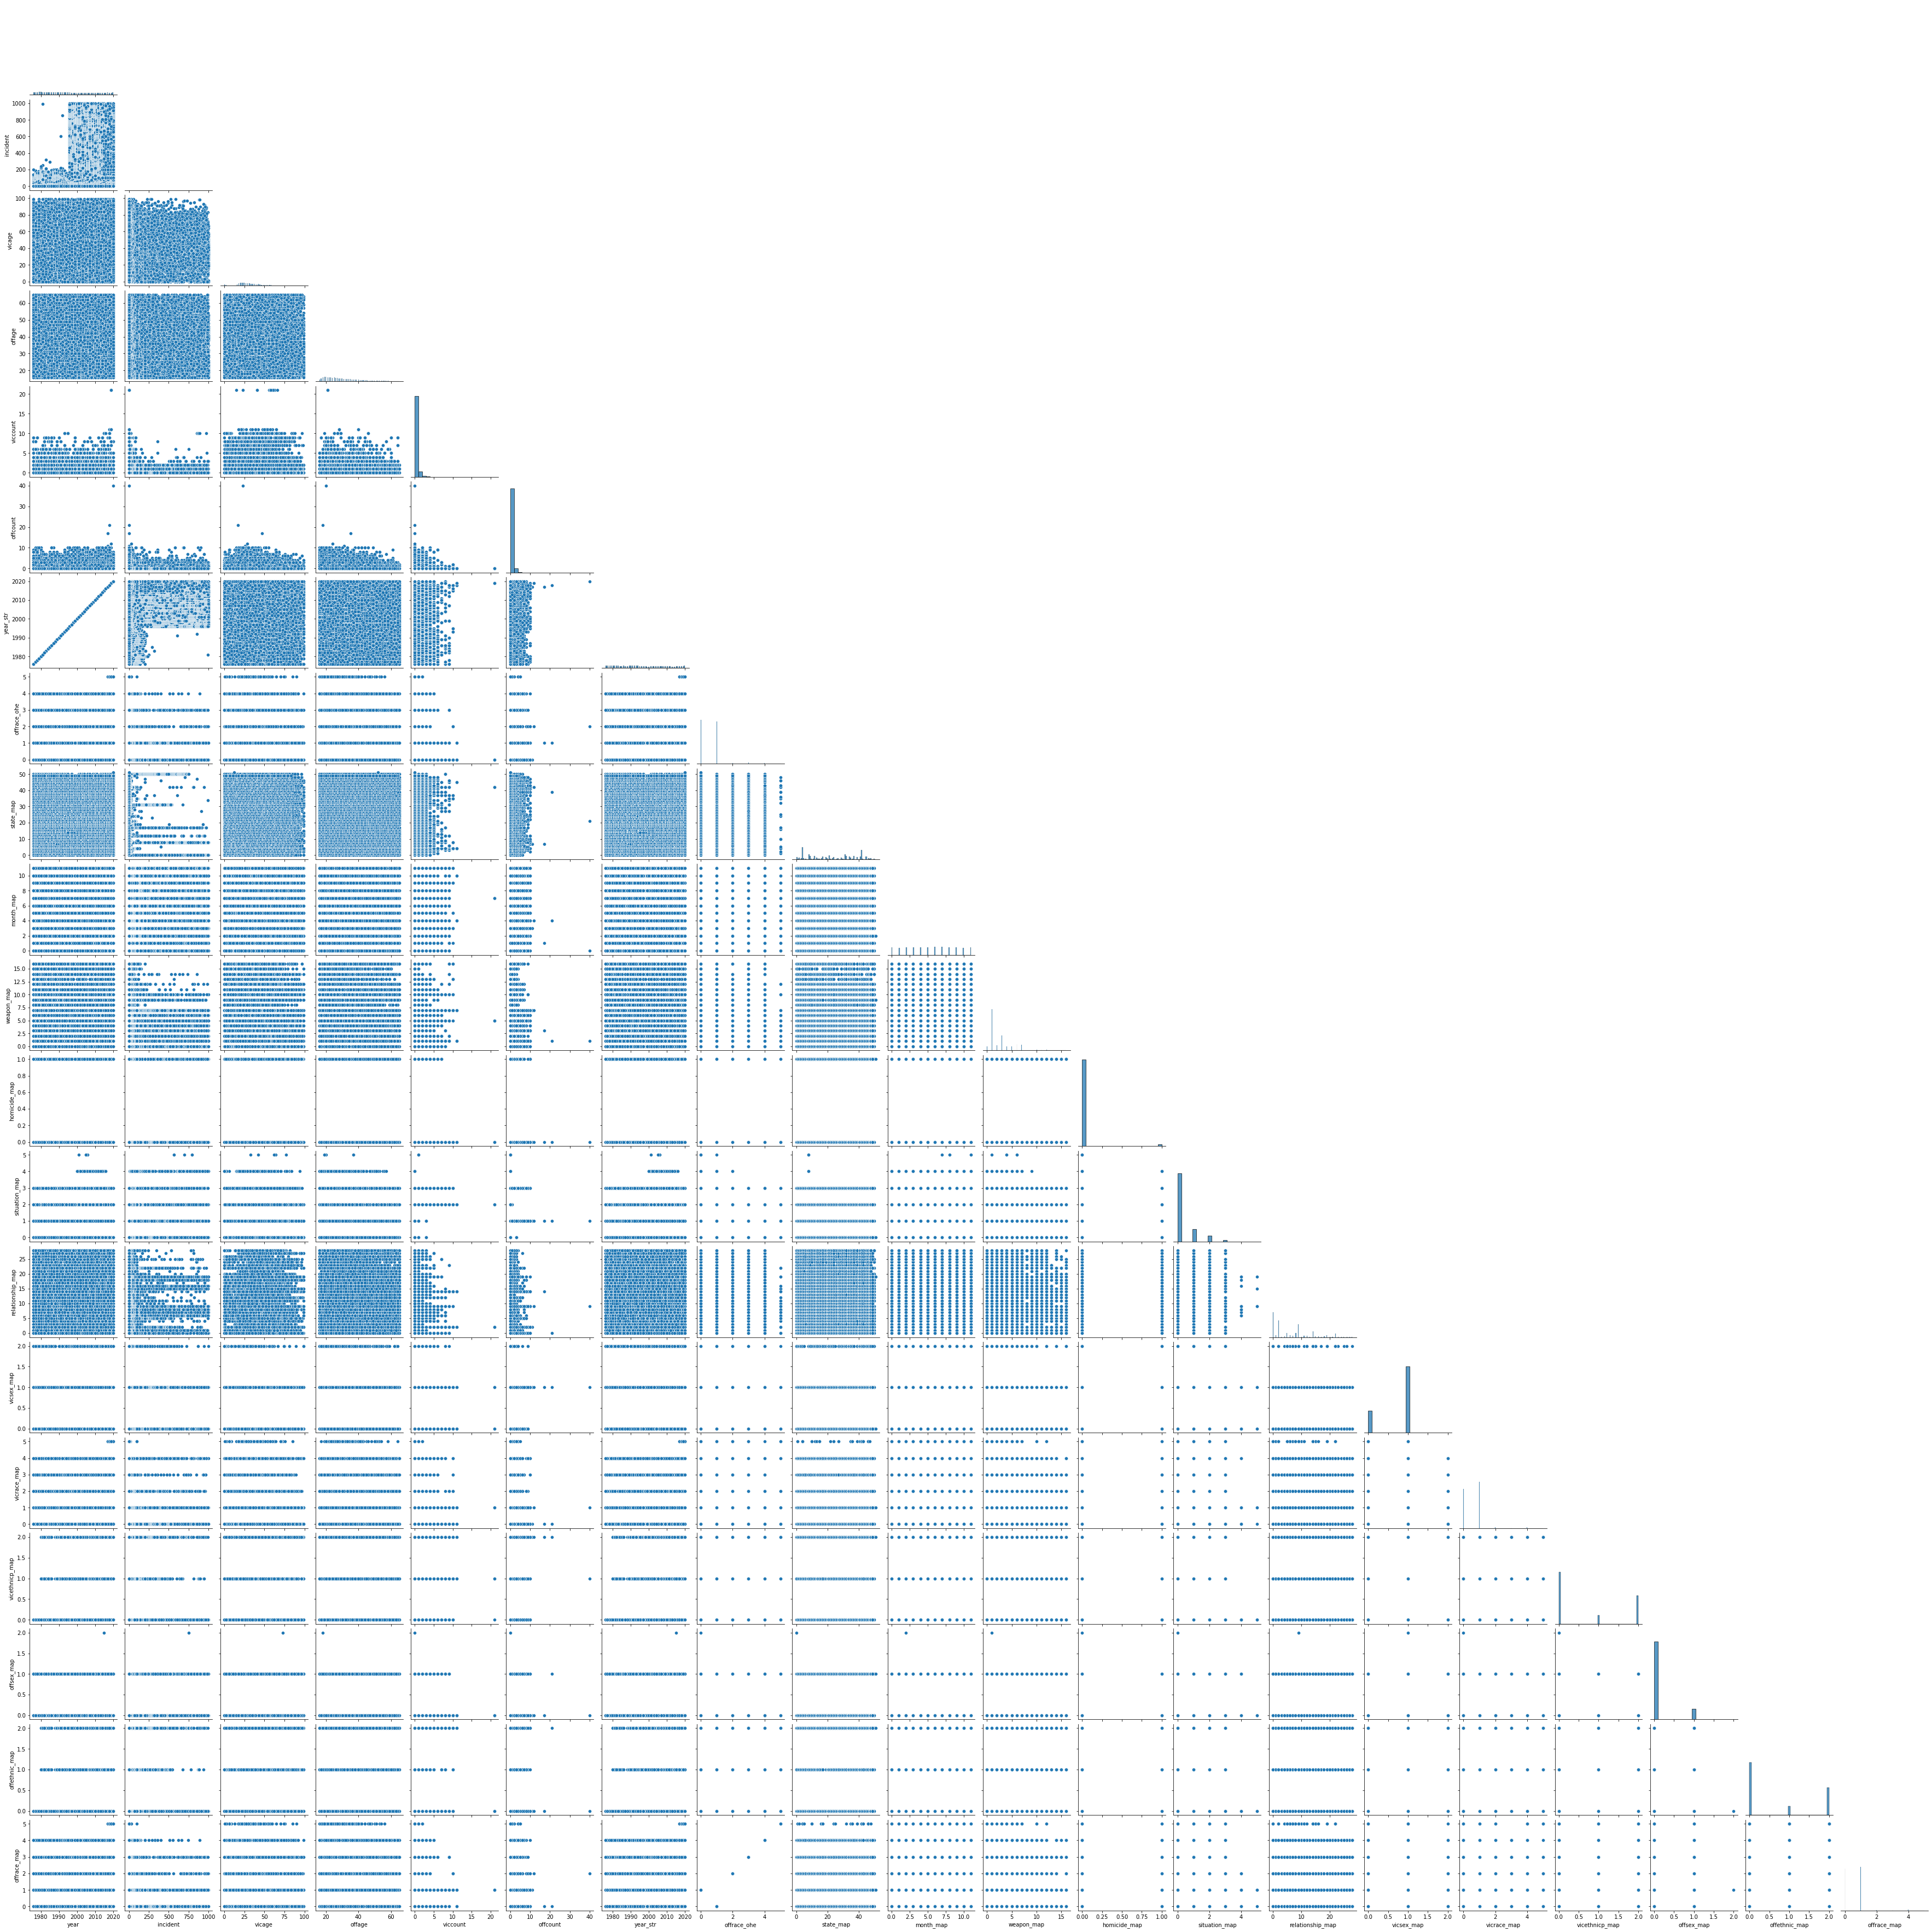

In [27]:
sns.pairplot(data = solved_mapdf,
            corner = True);

In [28]:
from sklearn.preprocessing import StandardScaler

# Scaling data because distance is important here.

ss = StandardScaler()
X_scaled = ss.fit_transform(solved_mapdf.drop(columns = ['id', 'cntyfips', 'ori', 'state', 'agency', 'agentype', 'source',
       'solved', 'month', 'incident', 'actiontype', 'homicide',
       'situation', 'vicsex', 'vicrace', 'vicethnic', 'monthyear', 'datetime',
       'offsex', 'offrace', 'offethnic', 'weapon', 'relationship',
       'circumstance', 'msa',
       'datetime']))

In [32]:
X_scaled.shape

(525871, 19)

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
inertia = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
inertia

[9991549.000000138,
 9047992.203337714,
 8443849.646134809,
 7963332.308165701,
 7496215.432818138,
 7144634.95293539,
 6861261.920151788,
 6452883.041617146,
 6214824.9531818805,
 5973453.351886815,
 5850472.235879871,
 5702731.937000357,
 5579656.498720276,
 5430318.200230656,
 5342309.700134783,
 5282103.49017089,
 5194048.854521735,
 5110325.214281768,
 5048831.413731016]

In [35]:
import plotly.express as px

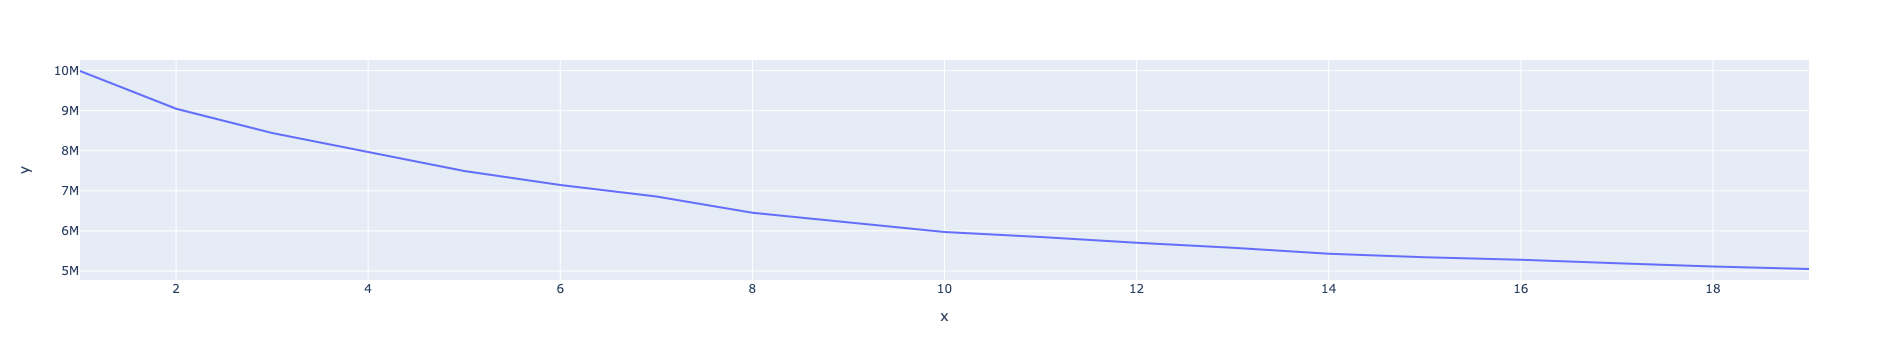

In [36]:
fig = px.line(x = range(1,20), 
             y = inertia)
fig.show()

In [37]:
kmeans_sil = KMeans(n_clusters = 11)

In [38]:
kmeans_sil.fit(X_scaled)

KMeans(n_clusters=11)

In [39]:
labels = kmeans_sil.labels_
labels

array([ 5, 10,  0, ...,  3,  3,  8], dtype=int32)

In [40]:
silhouette_score(X_scaled, labels = labels, sample_size=100000)

0.10678938269195921

In [41]:
solved_map_df.sample(15)

NameError: name 'solved_map_df' is not defined